### LeNet

In [11]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

### Loading Dataset

In [12]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Image Data Preprocessing

In [13]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### LeNet Model Architecture

In [14]:
# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3069 - accuracy: 0.9056 - val_loss: 0.0967 - val_accuracy: 0.9689
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0605 - val_accuracy: 0.9815
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0645 - accuracy: 0.9796 - val_loss: 0.0517 - val_accuracy: 0.9828
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0490 - accuracy: 0.9840 - val_loss: 0.0454 - val_accuracy: 0.9848
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.0466 - val_accuracy: 0.9858
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0393 - val_accuracy: 0.9866
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0425 - val_accuracy: 0.9860
Epoch 

In [17]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9893
Test Loss: 0.046425867825746536
Test accuracy: 0.989300012588501


Prediction is: 6
Image in the Database


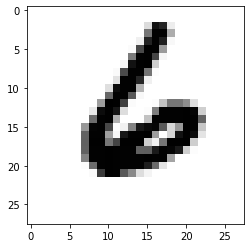

In [18]:
# Example 1
# Visualize a single image at the index 8888 (6 in the dataset)
image_index = 8888
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
rows=cols=28
pred = model.predict(x_test[image_index].reshape(1,rows, cols, 1))
print("Prediction is:", pred.argmax())
print("Image in the Database")

Prediction is: 9
Image in the Database


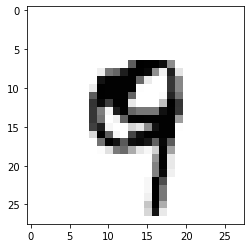

In [19]:
# Example 2
# Visualize a single image at the index 4444 (9 in the dataset)
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
rows=cols=28
pred = model.predict(x_test[image_index].reshape(1,rows, cols, 1))
print("Prediction is:", pred.argmax())
print("Image in the Database")

Prediction is: 4
Image in the Database


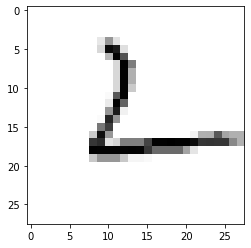

In [20]:
# Example 3
# Visualize a single image at the index 1224 (?? in the dataset)
image_index = 1224
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
rows=cols=28
pred = model.predict(x_test[image_index].reshape(1,rows, cols, 1))
print("Prediction is:", pred.argmax())
print("Image in the Database")